In [1]:
import pandas as pd

In [2]:
S=pd.read_csv("Sonar.csv")

In [3]:
S.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [4]:
dum=pd.get_dummies(S,drop_first=True)

In [6]:
X=dum.iloc[:,0:60]
y=dum.iloc[:,-1]

In [8]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25666)

In [10]:
#navie bays
from sklearn.naive_bayes import GaussianNB

In [11]:
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
ypred=gaussian.predict(X_test)

In [12]:
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.7777777777777778
[[22 11]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.71      0.90      0.79        30

   micro avg       0.78      0.78      0.78        63
   macro avg       0.80      0.78      0.78        63
weighted avg       0.80      0.78      0.78        63



In [13]:
#roc curve
from sklearn.metrics import roc_auc_score,roc_curve

In [15]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gaussian.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

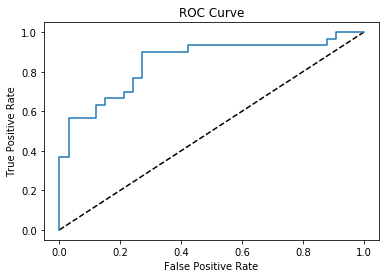

0.8474747474747475

In [17]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [20]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[29  4]
 [10 20]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.83      0.67      0.74        30

   micro avg       0.78      0.78      0.78        63
   macro avg       0.79      0.77      0.77        63
weighted avg       0.79      0.78      0.77        63

0.7777777777777778


In [21]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

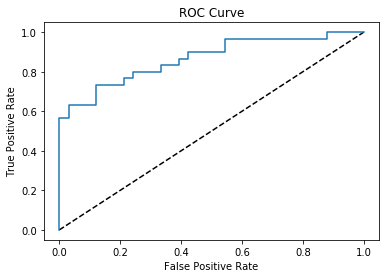

0.8666666666666666

In [22]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier(random_state=14512)
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

C:\Users\dbda4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
print(mean_squared_error(y_test,ypred))
print(mean_absolute_error(y_test,ypred))
print(r2_score(y_test,ypred))

0.2698412698412698
44.61904761904762
-0.08181818181818179


# Random Forest Regressor 

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
ypred=rfr.predict(X_train)

C:\Users\dbda4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
#print(mean_absolute_error(y_test,ypred))
#print(mean_squared_error(y_test,ypred))
#print(r2_score(y_test,ypred))

# SVR Grid Search CV

In [37]:
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.svm import SVR

C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])

param_grid = dict(C=C_range)

In [38]:
svr = SVR(kernel='linear')

svmGrid = GridSearchCV(svr, param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')

svmGrid.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.05, 0.1 , 1.  , 1.5 , 1.7 , 2.  , 4.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [39]:
# Best Parameters
print(svmGrid.best_params_)

{'C': 1.0}


In [40]:
print(svmGrid.best_score_)

-0.5354409385979294


# Support Vector Machine

In [42]:
from sklearn.svm import SVC

svc = SVC(probability = True,kernel='linear')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[31  2]
 [11 19]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        33
           1       0.90      0.63      0.75        30

   micro avg       0.79      0.79      0.79        63
   macro avg       0.82      0.79      0.79        63
weighted avg       0.82      0.79      0.79        63

0.7936507936507936


# Decision Tree Classifier and regressior 

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf=DecisionTreeClassifier(random_state=25415)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[23 10]
 [10 20]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        33
           1       0.67      0.67      0.67        30

   micro avg       0.68      0.68      0.68        63
   macro avg       0.68      0.68      0.68        63
weighted avg       0.68      0.68      0.68        63

0.6825396825396826


# Decision Tree Regressior

In [50]:
from sklearn.tree import DecisionTreeRegressor


In [51]:
clf = DecisionTreeRegressor(random_state=2019)
clf2 = clf.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred) ** 0.5)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


0.5909368402852788
0.3492063492063492
-0.40000000000000013


In [53]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2018)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=5,scoring='neg_mean_absolute_error')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)

print((-1)*cv.best_score_)

cv.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.5482545296061281


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2018, splitter='best')

# XGBOOST Algorithm CLASSifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
clf = GradientBoostingClassifier(random_state=1200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [57]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[24  9]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.72      0.77      0.74        30

   micro avg       0.75      0.75      0.75        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.75      0.75      0.75        63

0.746031746031746


# XGBoost Regression

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
clf = GradientBoostingRegressor(random_state=1200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.16125356286654519
0.3106951211733345
0.3535198070532143
